In [1]:
#대학평가(GridSearchCV)
import pandas as pd

df = pd.read_csv('c:/data/school/data.csv')

df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols = df.columns[0:8]
print(train_cols)

X = df[train_cols]
y = df['Label']
print(df[train_cols].head())
print(y.head())

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')
   teaching  international  research  citations  income  num_students  \
0      12.4           95.6      10.6       13.3    33.3          5226   
1      29.9           90.1      20.1       65.3    33.9          2473   
2      24.7           82.6      18.9       43.5    28.4          2473   
3      61.3           98.6      67.5       94.6    65.4          9666   
4      62.4           98.8      57.0       95.0    49.8          9666   

   student_staff_ratio  international_students  
0                 14.1                    0.82  
1                 15.6                    0.63  
2                 15.6                    0.63  
3                 10.5                    0.54  
4                 10.5                    0.54  
0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64


In [3]:
df['Label'].value_counts()

0    2158
1     445
Name: Label, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

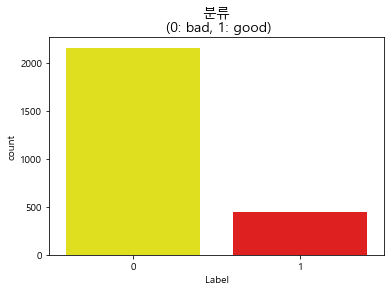

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']

sns.countplot('Label', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Label'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [7]:
df_samp['Label'].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [8]:
X = df_samp[train_cols]
y = df_samp['Label']

In [9]:
import statsmodels.api as sm
model = sm.Logit(y, X)
result = model.fit()
print(result.summary2())

#모델의 설명력 62%

Optimization terminated successfully.
         Current function value: 0.263067
         Iterations 8
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.620      
Dependent Variable:   Label             AIC:               484.2592   
Date:                 2021-12-16 11:55  BIC:               522.5889   
No. Observations:     890               Log-Likelihood:    -234.13    
Df Model:             7                 LL-Null:           -616.90    
Df Residuals:         882               LLR p-value:       5.0478e-161
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0665   0.0155 -4.2972 0.0000 -0.0969 -0.0362
int

In [10]:
df.columns

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students',
       'total_score', 'Label'],
      dtype='object')

In [11]:
cols = ['teaching', 'international', 'research', 'num_students', 'student_staff_ratio', 'international_students']

X = df_samp[cols]
model = sm.Logit(y, X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.278348
         Iterations 8
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.598      
Dependent Variable:   Label             AIC:               507.4587   
Date:                 2021-12-16 11:58  BIC:               536.2060   
No. Observations:     890               Log-Likelihood:    -247.73    
Df Model:             5                 LL-Null:           -616.90    
Df Residuals:         884               LLR p-value:       2.5105e-157
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0831   0.0133 -6.2369 0.0000 -0.1092 -0.0570
int

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)),
])

params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 100}
0.9156732490065824


In [13]:
scores=[]

In [14]:
scores.append(grid.best_score_)
scores

[0.9156732490065824]

In [15]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])

params = {
    'clf__max_depth': list(range(3,6))
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4}
0.7805949889283222


In [16]:
scores.append(grid.best_score_)
scores

[0.9156732490065824, 0.7805949889283222]

In [17]:
tree = grid.best_estimator_['clf']

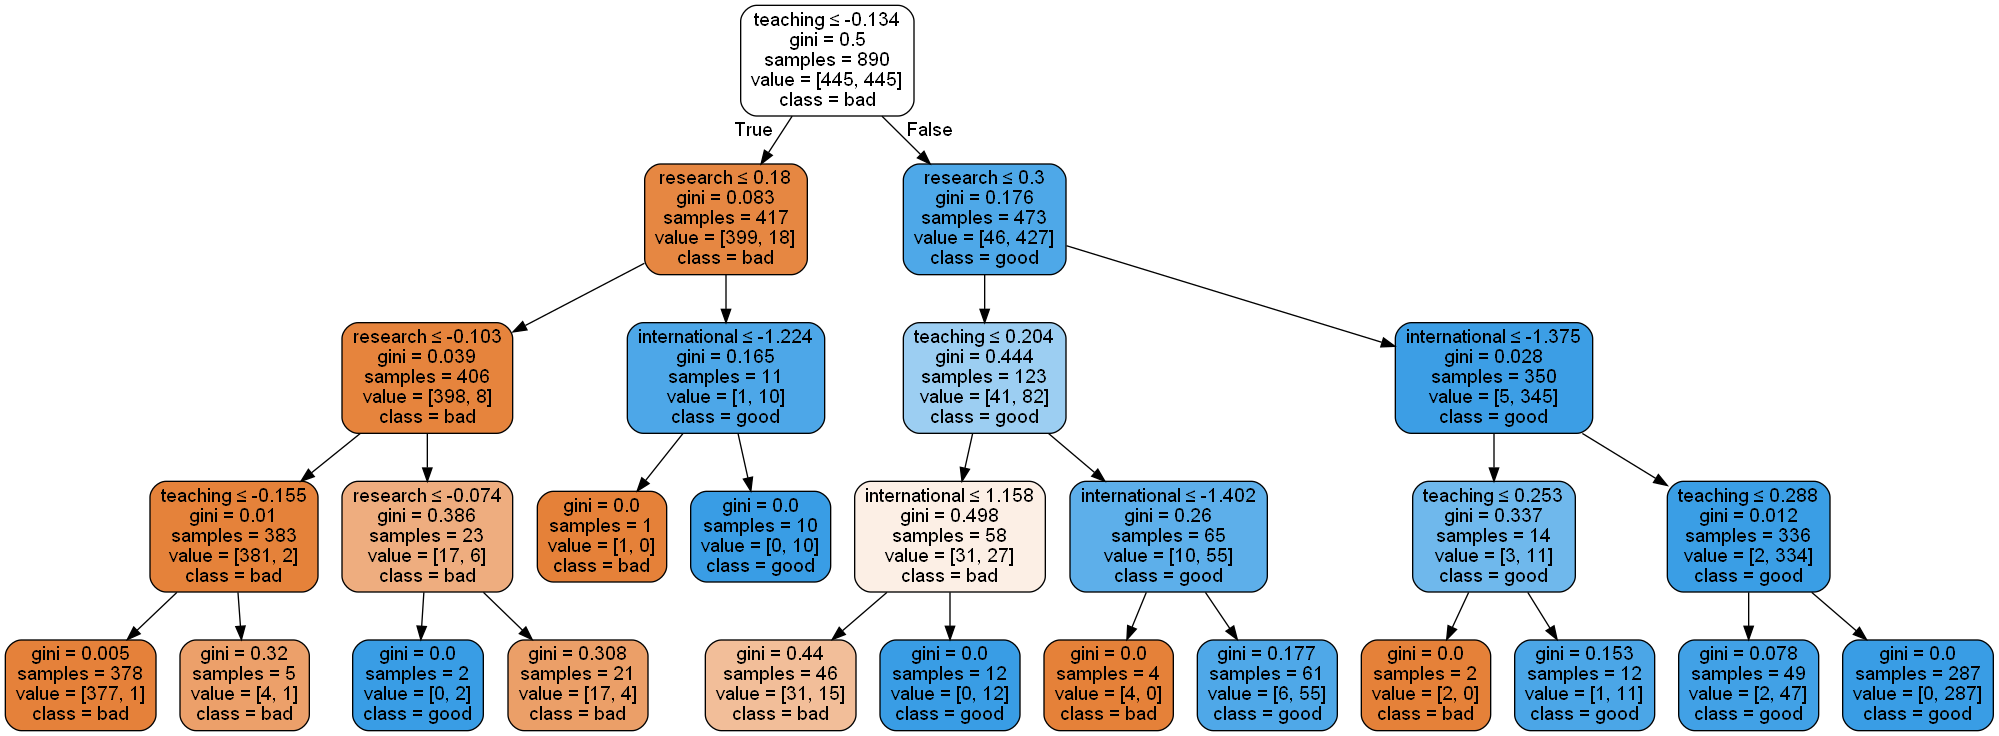

In [18]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=cols,
class_names=['bad', 'good'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

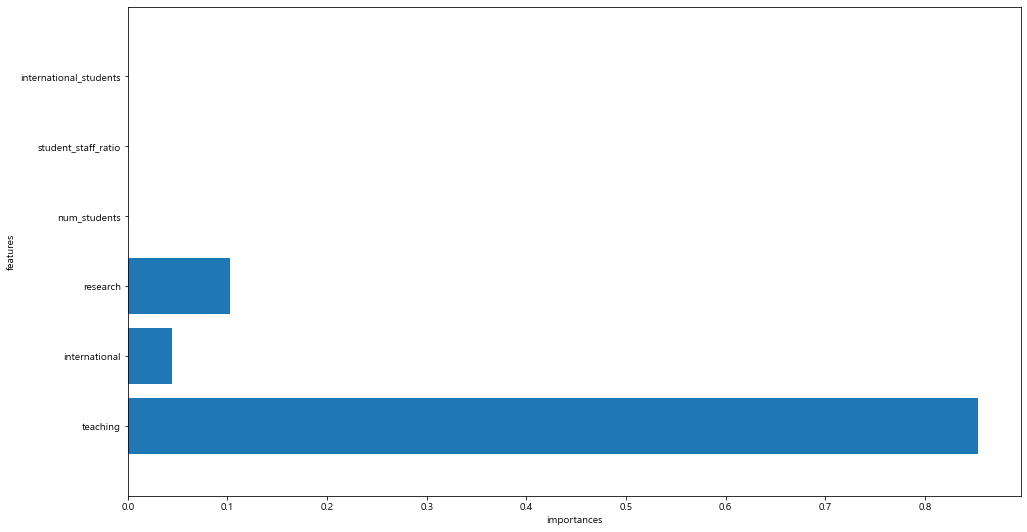

In [19]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성중요도 적용
# 0~1 사이의 값
import numpy as np

def plot_tree(model):
    n_featrues = X.shape[1]
    plt.rcParams['figure.figsize']=(16,9)
    plt.barh(range(n_featrues), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_featrues), cols)
    plt.xlabel('importances')
    plt.ylabel('features')
    plt.ylim(-1, n_featrues)

plot_tree(tree)

In [21]:
#랜덤포레스트(여러개의 의사결정나무)
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])

params = {
    'clf__max_depth': list(range(3,6)), #가지치기 범위
    'clf__n_estimators': list(range(10,110,10)), #생성할 나무 개수
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 50}
0.8267244517244517


In [22]:
scores.append(grid.best_score_)
scores

[0.9156732490065824, 0.7805949889283222, 0.8267244517244517]

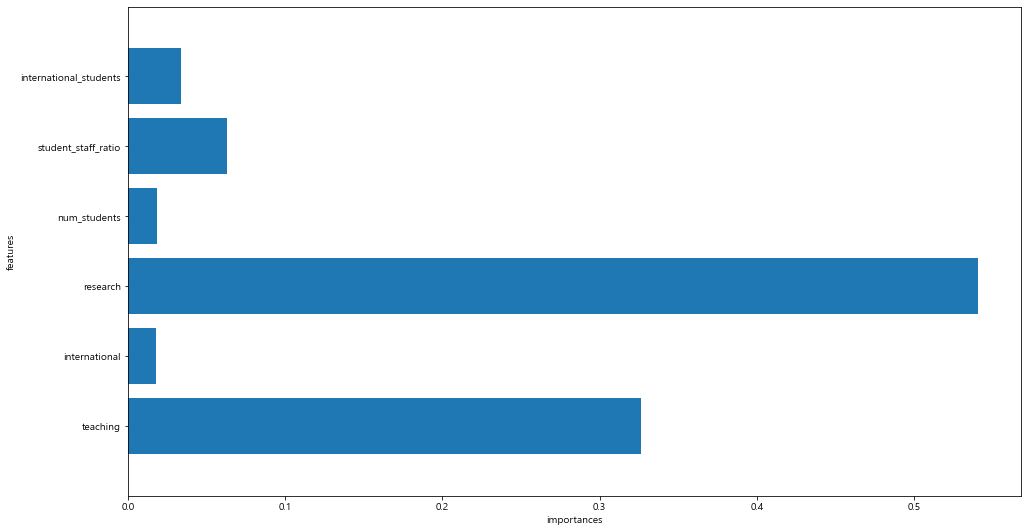

In [23]:
rf = grid.best_estimator_['clf']
plot_tree(rf)

In [25]:
#knn
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])

params = {
    'clf__n_neighbors': list(range(1,11)),
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 9}
0.8336480419813753


In [26]:
scores.append(grid.best_score_)
scores

[0.9156732490065824,
 0.7805949889283222,
 0.8267244517244517,
 0.8336480419813753]

In [27]:
#인공신경망
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=1000)),
])

params = {
    'clf__hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'clf__activation': ['tanh', 'relu'],
    'clf__alpha': [0.001, 0.01, 0.1]
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'clf__activation': 'tanh', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,)}
0.9134285800952467


In [28]:
scores.append(grid.best_score_)
scores

[0.9156732490065824,
 0.7805949889283222,
 0.8267244517244517,
 0.8336480419813753,
 0.9134285800952467]

In [30]:
#svm
from sklearn.svm import SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=0)),
])

params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 1000, 'clf__gamma': 0.0001}
0.9078017411350744


In [31]:
scores.append(grid.best_score_)
scores

[0.9156732490065824,
 0.7805949889283222,
 0.8267244517244517,
 0.8336480419813753,
 0.9134285800952467,
 0.9078017411350744]

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.91567325 0.78059499 0.82672445 0.83364804 0.91342858 0.90780174]
최적의 알고리즘: LOGIT
최적의 정확도: 0.9156732490065824


Text(0, 0.5, 'Accuracy')

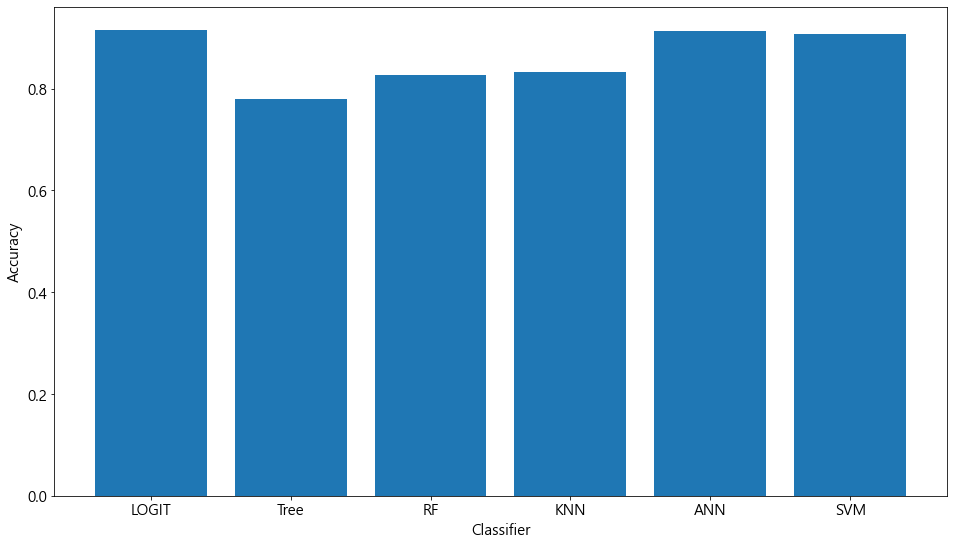

In [34]:
#알고리즘별 예측도 그래프
methods = ['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']

scores_arr = np.array(scores)
max_rate = np.max(scores_arr)
idx = np.argmax(scores_arr)


print(methods)
print(scores_arr)
print('최적의 알고리즘:',methods[idx])
print('최적의 정확도:', max_rate)

plt.rcParams['font.size'] = 15
plt.bar(methods, scores_arr)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')